In [2]:
import pandas as pd
import numpy as np

In [3]:
%pwd

'C:\\Users\\Himalay\\KPMG Internship'

In [4]:
cus_add=pd.read_excel('C:\\Users\\Himalay\\KPMG Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',header=1)
cus_demo=pd.read_excel('C:\\Users\\Himalay\\KPMG Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)
cus_trans=pd.read_excel('C:\\Users\\Himalay\\KPMG Internship\\KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions'  ,header=1)

# Task 1 - Data Quality:

In [5]:
cus_add

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [6]:
cus_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [7]:
cus_add.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [8]:
cus_add.duplicated().sum()

0

In [9]:
cus_add['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [10]:
##  here we have observed that same state has differnt name so we have to chnage to their name:
cus_add['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [11]:
cus_add['state']=cus_add['state'].str.replace('NSW','New South Wales').replace('VIC','Victoria')
cus_add['state'].unique()

array(['New South Wales', 'QLD', 'Victoria'], dtype=object)

In [12]:
cus_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [13]:
cus_trans.isnull().sum().sort_values(ascending=False)[:7]

online_order               360
product_first_sold_date    197
standard_cost              197
product_size               197
product_class              197
product_line               197
brand                      197
dtype: int64

In [14]:
cus_trans['product_first_sold_date']=pd.to_datetime(cus_trans['product_first_sold_date']).dt.date

In [15]:
cus_trans['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [16]:
cus_trans.duplicated().sum()

0

In [17]:
cus_trans.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [18]:
cus_trans['order_status'].value_counts()


Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [19]:
cus_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [20]:
cus_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [21]:
# So here we see that there is defalut column whihc we dont need and there are differnt category
# in ender column so we alsohave to rplace those
cus_demo['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [22]:
cus_demo.drop('default',axis=1,inplace=True)


In [23]:
cus_demo['gender']=cus_demo['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female')

In [24]:
from datetime import datetime
today = datetime.today()
cus_demo['Age']=today.year-cus_demo['DOB'].dt.year


In [25]:
cus_demo['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [26]:
cus_demo.isnull().sum().sort_values(ascending=False)

job_industry_category                  656
job_title                              506
last_name                              125
Age                                     87
tenure                                  87
DOB                                     87
owns_car                                 0
deceased_indicator                       0
wealth_segment                           0
past_3_years_bike_related_purchases      0
gender                                   0
first_name                               0
customer_id                              0
dtype: int64

In [27]:
cus_demo.duplicated().sum()

0

In [28]:
cus_demo.drop('deceased_indicator',axis=1,inplace=True)
cus_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,41.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0,67.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No,7.0,60.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes,8.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,19.0,46.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,Yes,1.0,20.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,No,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,Yes,10.0,48.0


# Task-2 Data Insights:


In [29]:
# Now we will merge this all data in one df.
all_data= pd.merge(pd.merge(cus_add,cus_demo),cus_trans)

In [30]:
pd.set_option('display.max_columns',None)
all_data

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,6309,69,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01
19964,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,8416,74,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01
19965,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,8562,33,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01
19966,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,14870,22,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01


In [31]:
# Here we can new col as profit:
all_data['Profit']=all_data['list_price']-all_data['standard_cost']
all_data

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01,110.56
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01,751.02
2,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01,189.28
3,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01,90.10
4,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,68.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,6309,69,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01,198.22
19964,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,8416,74,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01,827.16
19965,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,8562,33,2017-08-08,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01,144.26
19966,3500,9491 Green Ridge Terrace,2100,New South Wales,Australia,10,Josy,Fleeman,Female,71,1967-07-21,NaN,Entertainment,Affluent Customer,No,17.0,54.0,14870,22,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01,15.08


In [35]:
all_data.groupby('gender')['list_price'].sum()

gender
Female    11004937.76
Male      10581846.33
U           533367.03
Name: list_price, dtype: float64

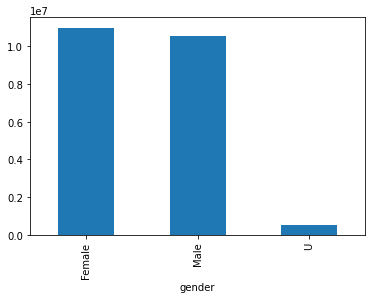

In [32]:
#Lets Find which gender buy more bikes:
all_data.groupby('gender')['list_price'].sum().plot.bar()




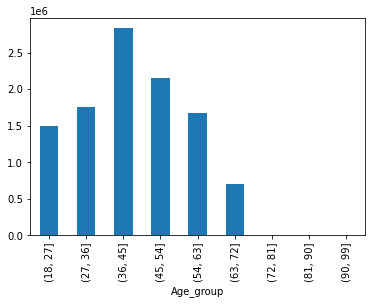

In [241]:
import matplotlib.pyplot as plt
all_data.groupby(['Age_group'])['Profit'].sum().plot.bar()

## Here we will use RFM Analysis:
### RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

In [192]:
### def apply_date(date):
    #date_format = "%Y-%m-%d"
    #a = datetime.strptime(list(date), date_format)
    #b = datetime.strptime(list('2017-12-30'), date_format)
   # return b-a
 

In [207]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          19968 non-null  int64          
 1   address                              19968 non-null  object         
 2   postcode                             19968 non-null  int64          
 3   state                                19968 non-null  object         
 4   country                              19968 non-null  object         
 5   property_valuation                   19968 non-null  int64          
 6   first_name                           19968 non-null  object         
 7   last_name                            19326 non-null  object         
 8   gender                               19968 non-null  object         
 9   past_3_years_bike_related_purchases  19968 non-null  int64          
 10

In [232]:
range(18,97,9)

range(18, 97, 9)

In [229]:
bins=[18, 27, 36, 45, 54, 63, 72, 81, 90, 99]
all_data['Age_group']=pd.cut(all_data['Age'], bins=bins)

In [233]:
pd.pivot_table(all_data,values='Profit',index='Age_group',columns='wealth_segment',aggfunc='sum')

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
Age_group,,,
"(18, 27]",423864.15,324120.84,742019.62
"(27, 36]",418299.34,472127.51,869190.44
"(36, 45]",664246.53,692591.88,1476184.34
"(45, 54]",521051.40,602821.94,1034872.85
"(54, 63]",413485.15,418582.25,845119.12
"(63, 72]",171262.12,186964.70,349223.32
"(72, 81]",2596.17,4523.23,1731.84
"(81, 90]",7212.17,NaN,1245.27


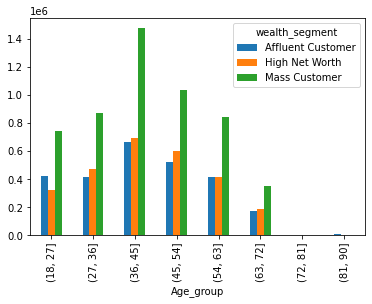

In [234]:
pd.pivot_table(all_data,values='Profit',index='Age_group',columns='wealth_segment',aggfunc='sum').plot.bar()

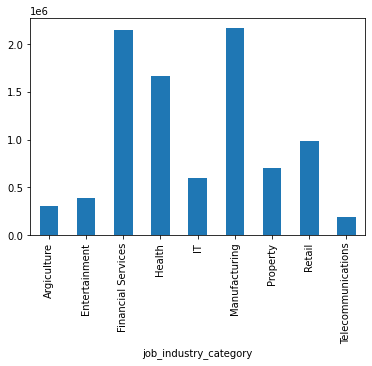

In [235]:
all_data.groupby(['job_industry_category'])['Profit'].sum().plot.bar()

In [236]:
all_data.to_csv('all_data.csv')

In [240]:
all_data.to_excel('final_data.xlsx')